In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train , y_train),(x_test , y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 196s 1us/step


In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
#normalize data
x_train = x_train/255

In [7]:
x_test = x_test/255

In [8]:
from tensorflow.keras.utils import to_categorical
#to convert train data to ctegories

In [9]:
y_cat_train = to_categorical(y_train,10)

In [10]:
y_cat_test = to_categorical(y_test,10)

create model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [12]:
model = Sequential()

#convolutional layer
model.add(Conv2D(filters = 32, kernel_size=(4,4),input_shape=(32,32,3),activation = 'relu',))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#convolutional layer
model.add(Conv2D(filters = 32, kernel_size=(4,4),input_shape=(32,32,3),activation = 'relu',))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' ,metrics = ['accuracy'])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [15]:
#early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [17]:
#train model
model.fit(x_train,y_cat_train,epochs=15,
         validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 14s 272us/sample - loss: 1.5001 - accuracy: 0.4574 - val_loss: 1.2414 - val_accuracy: 0.5557
Epoch 2/15
50000/50000 [==============================] - 8s 157us/sample - loss: 1.1416 - accuracy: 0.5981 - val_loss: 1.0868 - val_accuracy: 0.6192
Epoch 3/15
50000/50000 [==============================] - 8s 162us/sample - loss: 0.9848 - accuracy: 0.6543 - val_loss: 0.9995 - val_accuracy: 0.6506
Epoch 4/15
50000/50000 [==============================] - 10s 190us/sample - loss: 0.8850 - accuracy: 0.6900 - val_loss: 1.0243 - val_accuracy: 0.6485
Epoch 5/15
50000/50000 [==============================] - 11s 212us/sample - loss: 0.7973 - accuracy: 0.7227 - val_loss: 0.9660 - val_accuracy: 0.6733
Epoch 6/15
50000/50000 [==============================] - 11s 211us/sample - loss: 0.7226 - accuracy: 0.7459 - val_loss: 0.9189 - val_accuracy: 0.6897
Epoch 7/15
50000/50000 [======================

In [18]:
metrics = pd.DataFrame(model.history.history)

In [19]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.500065,0.45738,1.241356,0.5557
1,1.141636,0.59808,1.086820,0.6192
2,0.984777,0.65426,0.999539,0.6506
3,0.885017,0.68998,1.024321,0.6485
4,0.797275,0.72266,0.966038,0.6733
5,0.722577,0.74592,0.918938,0.6897
6,0.647350,0.77402,1.011520,0.6755
7,0.583040,0.79594,1.024142,0.6756


In [20]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

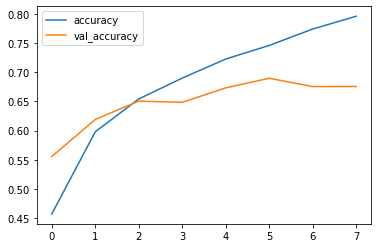

In [22]:
metrics[['accuracy', 'val_accuracy']].plot()

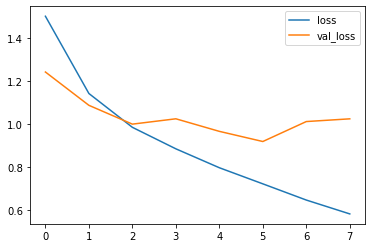

In [23]:
metrics[['loss', 'val_loss']].plot()

In [24]:
model.evaluate(x_test,y_cat_test,verbose =0)

[1.024142398452759, 0.6756]

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
prediction = model.predict_classes(x_test)

In [27]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1000
           1       0.86      0.75      0.80      1000
           2       0.55      0.63      0.59      1000
           3       0.44      0.57      0.49      1000
           4       0.68      0.58      0.63      1000
           5       0.54      0.60      0.57      1000
           6       0.83      0.68      0.75      1000
           7       0.74      0.76      0.75      1000
           8       0.82      0.73      0.77      1000
           9       0.77      0.74      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



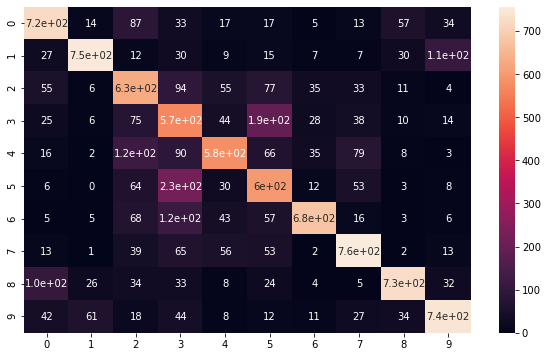

In [29]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,prediction),annot= True)

In [34]:
my_image = x_test[100]

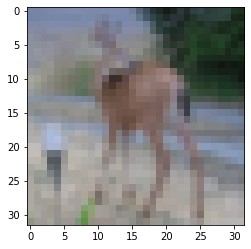

In [35]:
plt.imshow(my_image)

In [36]:
y_test[100]

array([4], dtype=uint8)

In [37]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([4], dtype=int64)